In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm, skew

In [2]:
train_data=pd.read_csv('F:\Kaggle_Competition\House_Price_Prediction\Train.csv')
test_data=pd.read_csv('F:\Kaggle_Competition\House_Price_Prediction\Test.csv')

In [3]:
all_data=pd.concat([train_data,test_data],axis=0)

c:\users\dhusor\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [4]:
all_data.drop(['SalePrice'],axis=1,inplace=True)

In [5]:
all_data.shape

(2919, 80)

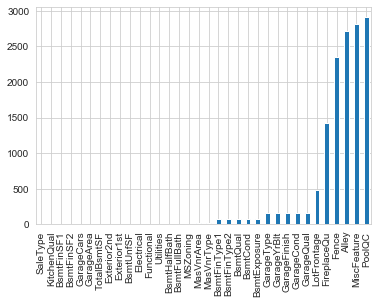

In [6]:
missing = all_data.isnull().sum()
missing = missing[missing > 0]

sns.set_style("whitegrid")

missing.sort_values(inplace=True)
missing.plot.bar()

In [7]:
missing.sort_values(ascending=False)

PoolQC          2909
MiscFeature     2814
Alley           2721
Fence           2348
FireplaceQu     1420
LotFrontage      486
GarageYrBlt      159
GarageFinish     159
GarageCond       159
GarageQual       159
GarageType       157
BsmtExposure      82
BsmtCond          82
BsmtQual          81
BsmtFinType2      80
BsmtFinType1      79
MasVnrType        24
MasVnrArea        23
MSZoning           4
BsmtFullBath       2
BsmtHalfBath       2
Utilities          2
Functional         2
Electrical         1
BsmtUnfSF          1
Exterior1st        1
Exterior2nd        1
TotalBsmtSF        1
GarageArea         1
GarageCars         1
BsmtFinSF2         1
BsmtFinSF1         1
KitchenQual        1
SaleType           1
dtype: int64

In [8]:
all_data.drop(['PoolQC','Alley','Fence','Id','MiscFeature','FireplaceQu'],axis=1,inplace=True)

In [9]:
missing = all_data.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(ascending=False)

LotFrontage     486
GarageYrBlt     159
GarageQual      159
GarageFinish    159
GarageCond      159
GarageType      157
BsmtCond         82
BsmtExposure     82
BsmtQual         81
BsmtFinType2     80
BsmtFinType1     79
MasVnrType       24
MasVnrArea       23
MSZoning          4
BsmtFullBath      2
BsmtHalfBath      2
Utilities         2
Functional        2
Exterior1st       1
Electrical        1
BsmtUnfSF         1
Exterior2nd       1
TotalBsmtSF       1
GarageCars        1
KitchenQual       1
BsmtFinSF2        1
BsmtFinSF1        1
SaleType          1
GarageArea        1
dtype: int64

In [10]:
missing=all_data.columns[all_data.isna().any()].tolist()

In [11]:
na_num=all_data[missing].select_dtypes(include=[np.number])

In [12]:
na_cat=all_data[missing].select_dtypes(include=[np.object])

In [13]:
na_num.columns

Index(['BsmtFinSF1', 'BsmtFinSF2', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtUnfSF',
       'GarageArea', 'GarageCars', 'GarageYrBlt', 'LotFrontage', 'MasVnrArea',
       'TotalBsmtSF'],
      dtype='object')

In [14]:
na_num

,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,GarageArea,GarageCars,GarageYrBlt,LotFrontage,MasVnrArea,TotalBsmtSF
0,706.0,0.0,1.0,0.0,150.0,548.0,2.0,2003.0,65.0,196.0,856.0
1,978.0,0.0,0.0,1.0,284.0,460.0,2.0,1976.0,80.0,0.0,1262.0
2,486.0,0.0,1.0,0.0,434.0,608.0,2.0,2001.0,68.0,162.0,920.0
3,216.0,0.0,1.0,0.0,540.0,642.0,3.0,1998.0,60.0,0.0,756.0
4,655.0,0.0,1.0,0.0,490.0,836.0,3.0,2000.0,84.0,350.0,1145.0
5,732.0,0.0,1.0,0.0,64.0,480.0,2.0,1993.0,85.0,0.0,796.0
6,1369.0,0.0,1.0,0.0,317.0,636.0,2.0,2004.0,75.0,186.0,1686.0
7,859.0,32.0,1.0,0.0,216.0,484.0,2.0,1973.0,NaN,240.0,1107.0
8,0.0,0.0,0.0,0.0,952.0,468.0,2.0,1931.0,51.0,0.0,952.0
9,851.0,0.0,1.0,0.0,140.0,205.0,1.0,1939.0,50.0,0.0,991.0


In [15]:
all_data['BsmtFinSF1'].fillna(0,inplace=True)
all_data['BsmtFinSF2'].fillna(0,inplace=True)
all_data['BsmtFullBath'].fillna(0,inplace=True)
all_data['BsmtHalfBath'].fillna(0,inplace=True)
all_data['BsmtUnfSF'].fillna(0,inplace=True)
all_data['GarageArea'].fillna(0,inplace=True)
all_data['GarageCars'].fillna(0,inplace=True)
all_data['GarageYrBlt'].fillna(all_data['GarageYrBlt'].mean(),inplace=True)
all_data['LotFrontage'].fillna(all_data['LotFrontage'].mean(),inplace=True)  
all_data['MasVnrArea'].fillna(0,inplace=True)
all_data['TotalBsmtSF'].fillna(0,inplace=True)

In [16]:
na_cat.columns

Index(['BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'BsmtQual',
       'Electrical', 'Exterior1st', 'Exterior2nd', 'Functional', 'GarageCond',
       'GarageFinish', 'GarageQual', 'GarageType', 'KitchenQual', 'MSZoning',
       'MasVnrType', 'SaleType', 'Utilities'],
      dtype='object')

In [17]:
all_data['BsmtCond']= all_data['BsmtCond'].fillna( all_data['BsmtCond'].mode()[0])

all_data['BsmtExposure']= all_data['BsmtExposure'].fillna( all_data['BsmtExposure'].mode()[0])

all_data['BsmtFinType1']= all_data['BsmtFinType1'].fillna( all_data['BsmtFinType1'].mode()[0])

all_data['BsmtFinType2']= all_data['BsmtFinType2'].fillna( all_data['BsmtFinType2'].mode()[0])

all_data['BsmtQual']= all_data['BsmtQual'].fillna( all_data['BsmtQual'].mode()[0])

all_data['Electrical']= all_data['Electrical'].fillna( all_data['Electrical'].mode()[0])

all_data['Exterior1st']= all_data['Exterior1st'].fillna( all_data['Exterior1st'].mode()[0])

all_data['Exterior2nd']= all_data['Exterior2nd'].fillna( all_data['Exterior2nd'].mode()[0])

all_data['Functional']= all_data['Functional'].fillna( all_data['Functional'].mode()[0])

all_data['GarageCond']= all_data['GarageCond'].fillna( all_data['GarageCond'].mode()[0])

all_data['GarageFinish']= all_data['GarageFinish'].fillna( all_data['GarageFinish'].mode()[0])

all_data['GarageQual']= all_data['GarageQual'].fillna( all_data['GarageQual'].mode()[0])

all_data['GarageType']= all_data['GarageType'].fillna( all_data['GarageType'].mode()[0])

all_data['KitchenQual']= all_data['KitchenQual'].fillna( all_data['KitchenQual'].mode()[0])

all_data['MSZoning']= all_data['MSZoning'].fillna( all_data['MSZoning'].mode()[0])

all_data['MasVnrType']= all_data['MasVnrType'].fillna( all_data['MasVnrType'].mode()[0])

all_data['SaleType']= all_data['SaleType'].fillna( all_data['SaleType'].mode()[0])

all_data['Utilities']= all_data['Utilities'].fillna( all_data['Utilities'].mode()[0])


In [18]:
missing=all_data.columns[all_data.isna().any()].tolist()
missing

[]

# Now we have to see Target variable is normaly Distributed or not

Text(0.5, 1.0, 'Sales Price')

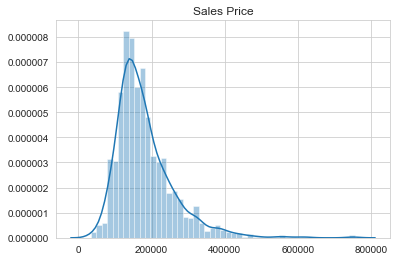

In [19]:
sns.distplot(a=train_data['SalePrice'],axlabel=False).set_title('Sales Price')

target variable sales price ar positive skewed so log tranform for normalize

In [20]:
y=np.log1p(train_data['SalePrice'])

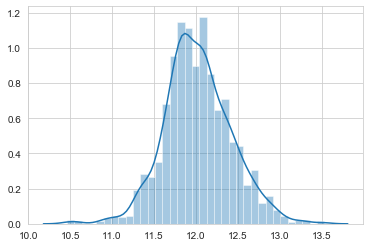

In [21]:
sns.distplot(a=y,axlabel=False)


In [22]:
all_data.shape

(2919, 74)

# Feature Selection

In [23]:
X=all_data[: 1460]

In [24]:
fe=pd.concat([X,y],axis=1)

In [25]:
cor_mat=fe[:].corr()

In [26]:
cor_with_target=cor_mat.sort_values(['SalePrice'], ascending=False)
cor_with_target.SalePrice

SalePrice        1.000000
OverallQual      0.817185
GrLivArea        0.700927
GarageCars       0.680625
GarageArea       0.650888
TotalBsmtSF      0.612134
1stFlrSF         0.596981
FullBath         0.594771
YearBuilt        0.586570
YearRemodAdd     0.565608
TotRmsAbvGrd     0.534422
GarageYrBlt      0.501656
Fireplaces       0.489450
MasVnrArea       0.426776
BsmtFinSF1       0.372023
LotFrontage      0.335555
WoodDeckSF       0.334135
OpenPorchSF      0.321053
2ndFlrSF         0.319300
HalfBath         0.313982
LotArea          0.257320
BsmtFullBath     0.236224
BsmtUnfSF        0.221985
BedroomAbvGr     0.209043
ScreenPorch      0.121208
PoolArea         0.069798
MoSold           0.057330
3SsnPorch        0.054900
BsmtFinSF2       0.004832
BsmtHalfBath    -0.005149
MiscVal         -0.020021
OverallCond     -0.036868
YrSold          -0.037263
LowQualFinSF    -0.037963
MSSubClass      -0.073959
KitchenAbvGr    -0.147548
EnclosedPorch   -0.149050
Name: SalePrice, dtype: float64

In [27]:
# all_data.drop(['PoolArea','MoSold','3SsnPorch','BsmtFinSF2','BsmtHalfBath','MiscVal','OverallCond','YrSold'
#                ,'LowQualFinSF','MSSubClass','KitchenAbvGr','EnclosedPorch'],axis=1,inplace=True)

# Remove Skewness

In [28]:
# numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index
# skewed_feats = all_data[numeric_feats].apply(lambda x: skew(x.dropna())) #compute skewness
# skewed_feats = skewed_feats[skewed_feats > 0.50]
# skewed_feats = skewed_feats.index
# all_data[skewed_feats] = np.log1p(all_data[skewed_feats])

for feature in all_data:
    if all_data[feature].dtype != "object":

            all_data[feature] = np.log1p(all_data[feature])


In [29]:
all_data.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,...,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,6.753438,6.751101,0.0,1.386294,1Fam,TA,No,6.561031,0.0,GLQ,...,WD,0.0,Pave,2.197225,6.753438,AllPub,0.000000,7.602900,7.602900,7.605392
1,7.141245,0.000000,0.0,1.386294,1Fam,TA,Gd,6.886532,0.0,ALQ,...,WD,0.0,Pave,1.945910,7.141245,AllPub,5.700444,7.589336,7.589336,7.604894
2,6.825460,6.765039,0.0,1.386294,1Fam,TA,Mn,6.188264,0.0,GLQ,...,WD,0.0,Pave,1.945910,6.825460,AllPub,0.000000,7.601902,7.602401,7.605392
3,6.869014,6.629363,0.0,1.386294,1Fam,Gd,No,5.379897,0.0,ALQ,...,WD,0.0,Pave,2.079442,6.629363,AllPub,0.000000,7.557995,7.586296,7.604396
4,7.044033,6.960348,0.0,1.609438,1Fam,TA,Av,6.486161,0.0,GLQ,...,WD,0.0,Pave,2.302585,7.044033,AllPub,5.262690,7.601402,7.601402,7.605392


# Dummies Variable

In [30]:
all_object_columns=all_data.select_dtypes(include=['object']).columns.tolist

In [31]:
all_object_columns

<bound method IndexOpsMixin.tolist of Index(['BldgType', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'BsmtQual', 'CentralAir', 'Condition1', 'Condition2', 'Electrical',
       'ExterCond', 'ExterQual', 'Exterior1st', 'Exterior2nd', 'Foundation',
       'Functional', 'GarageCond', 'GarageFinish', 'GarageQual', 'GarageType',
       'Heating', 'HeatingQC', 'HouseStyle', 'KitchenQual', 'LandContour',
       'LandSlope', 'LotConfig', 'LotShape', 'MSZoning', 'MasVnrType',
       'Neighborhood', 'PavedDrive', 'RoofMatl', 'RoofStyle', 'SaleCondition',
       'SaleType', 'Street', 'Utilities'],
      dtype='object')>

In [32]:
combined_data_dummies=pd.get_dummies(all_data[['BldgType', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'BsmtQual', 'CentralAir', 'Condition1', 'Condition2', 'Electrical',
       'ExterCond', 'ExterQual', 'Exterior1st', 'Exterior2nd', 'Foundation',
       'Functional', 'GarageCond', 'GarageFinish', 'GarageQual', 'GarageType',
       'Heating', 'HeatingQC', 'HouseStyle', 'KitchenQual', 'LandContour',
       'LandSlope', 'LotConfig', 'LotShape', 'MSZoning', 'MasVnrType',
       'Neighborhood', 'PavedDrive', 'RoofMatl', 'RoofStyle', 'SaleCondition',
       'SaleType', 'Street', 'Utilities']])

In [33]:
combined_data_dummies.shape

(2919, 234)

In [34]:
all_nu_columns=all_data.select_dtypes(include=np.number).columns.tolist()

In [35]:
all_nu=all_data[all_nu_columns]

In [36]:
all_data=pd.concat([combined_data_dummies,all_nu],axis=1)

In [37]:
X=all_data[: 1460]
test=all_data[1460: ]

In [38]:
X.shape

(1460, 270)

In [39]:
## using standard scaler to normalize the training data

from sklearn.preprocessing import MinMaxScaler
#Scaler = StandardScaler()
Scaler = MinMaxScaler()

## using principal component analysis to reduce the dimensionality of the features
## principal componenets taken 36
from sklearn.decomposition import PCA

pca = PCA(n_components=30)

X = Scaler.fit_transform(X)
test= Scaler.transform(test)


X = pca.fit_transform(X)
test = pca.transform(test)

In [40]:
X.shape

(1460, 30)

In [41]:
from sklearn.linear_model import Lasso
import xgboost

In [42]:
classifier1=xgboost.XGBRegressor(max_depth=3,learning_rate=0.1,n_estimators=1000,)
# classifier2 = Lasso()

In [43]:
# from sklearn.model_selection import RandomizedSearchCV

# est = xgboost.XGBRegressor()
# rf_p_dist={'max_depth':[3,5,10],
#               'n_estimators':[10,100,200,300,400,500],
#                'learning_rate':[0.1,0.2,0.3]
#               }
# def hypertuning_rscv(est, p_distr, nbr_iter,X,y):
#     rdmsearch = RandomizedSearchCV(est, param_distributions=p_distr,
#                                   n_jobs=-1, n_iter=nbr_iter, cv=9)
#     #CV = Cross-Validation ( here using Stratified KFold CV)
#     rdmsearch.fit(X,y)
#     ht_params = rdmsearch.best_params_
#     ht_score = rdmsearch.best_score_
#     return ht_params, ht_score

# rf_parameters, rf_ht_score = hypertuning_rscv(est, rf_p_dist, 40, X, y)


In [44]:
# rf_parameters

In [45]:
classifier1.fit(X,y)
# classifier2.fit(X,y)

c:\users\dhusor\appdata\local\programs\python\python37\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[17:40:55] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=1000,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [46]:
y_pred1=classifier1.predict(test)
# y_pred2=classifier2.predict(test)

In [47]:
# y_pred=(y_pred1+y_pred2)/2
y_pred=y_pred1
y_pred=np.expm1(y_pred)

In [48]:
Id=test_data['Id']
Id_df=pd.DataFrame(Id,columns=['Id'])
y_pred_df=pd.DataFrame(y_pred,columns=['SalePrice'])
result1=pd.concat([Id,y_pred_df],axis=1)
result1.to_csv('sample_submission.csv',index=False)

# Deep Learning 

In [ ]:
# import torch.nn as nn
# import torch.nn.functional as F

In [ ]:
# X_d=torch.Tensor(X)
# y_d=torch.Tensor(y)
# test_d=torch.Tensor(test)

In [ ]:
# class Model(torch.nn.Module):
#     def __init__ (self):
#         super().__init__()
#         self.fc1=nn.Linear(36,1)
#         self.fc2=nn.Linear(36,36)
#         self.fc3=nn.Linear(36,36)
#         self.fc4=nn.Linear(36,1)
        
#     def forward(self,x):
#         y_pred=F.relu(self.fc1(x))
#         x=F.relu(self.fc2(x))
#         x=F.relu(self.fc3(x))
#         x=F.relu(self.fc4(x))
#         return y_pred
        


In [ ]:
# regressor=Model()
# loss_func=nn.MSELoss()
# optimizer=torch.optim.SGD(regressor.parameters(),lr=0.0001)
    

In [ ]:
# for epoch in range(500):
#     y_pred=regressor(X_d)
#     loss=loss_func(y_pred,y_d)
#     loss.backward()
#     optimizer.zero_grad()
#     optimizer.step()
    

In [ ]:
# pred_d=pred_d.detach().numpy()


In [ ]:
# pred_d=np.expm1(pred_d)

# Keras

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense
# from keras.layers import LeakyRelu,PReLu,ELU
from keras.layers import Dropout

In [ ]:
classifier=Sequential()
classifier.add(Dense(units=100,kernel_initializer='he_uniform',activation='relu',input_dim=30))
classifier.add(Dense(units=100,kernel_initializer='he_uniform',activation='relu',input_dim=100))
classifier.add(Dense(units=100,kernel_initializer='he_uniform',activation='relu',input_dim=100))
classifier.add(Dense(units=100,kernel_initializer='he_uniform',activation='relu',input_dim=100))
classifier.add(Dense(units=50,kernel_initializer='he_uniform',activation='relu',input_dim=100))
classifier.add(Dense(units=50,kernel_initializer='he_uniform',activation='relu',input_dim=50))
classifier.add(Dense(units=40,kernel_initializer='he_uniform',activation='relu',input_dim=50))
classifier.add(Dense(units=40,kernel_initializer='he_uniform',activation='relu',input_dim=40))
classifier.add(Dense(units=30,kernel_initializer='he_uniform',activation='relu',input_dim=40))
classifier.add(Dense(units=30,kernel_initializer='he_uniform',activation='relu',input_dim=30))
classifier.add(Dense(units=20,kernel_initializer='he_uniform',activation='relu',input_dim=30))
classifier.add(Dense(units=10,kernel_initializer='he_uniform',activation='relu',input_dim=20))

classifier.add(Dense(units=5,kernel_initializer='he_uniform',activation='relu'))

classifier.add(Dense(units=1,kernel_initializer='he_uniform'))

In [ ]:
classifier.compile(optimizer='adamax',loss='mean_squared_error')
model=classifier.fit(X,y,validation_split=0.2,batch_size=10,nb_epoch=1000)

In [ ]:
y_pred=classifier.predict(test)
y_pred=np.expm1(y_pred)

In [ ]:
Id=test_data['Id']
Id_df=pd.DataFrame(Id,columns=['Id'])
y_pred_df=pd.DataFrame(y_pred,columns=['SalePrice'])
result1=pd.concat([Id,y_pred_df],axis=1)
result1.to_csv('sample_submission.csv',index=False)